# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [2]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


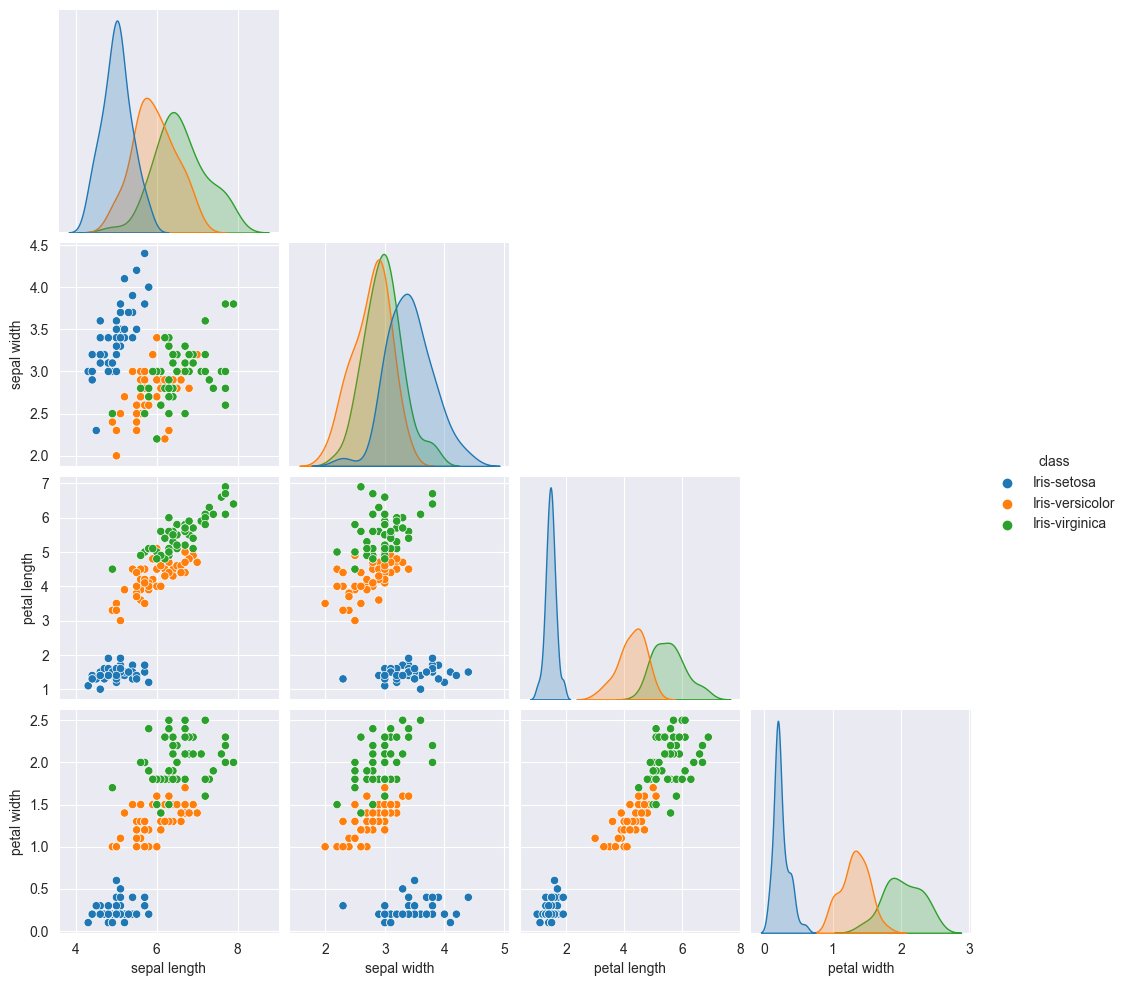

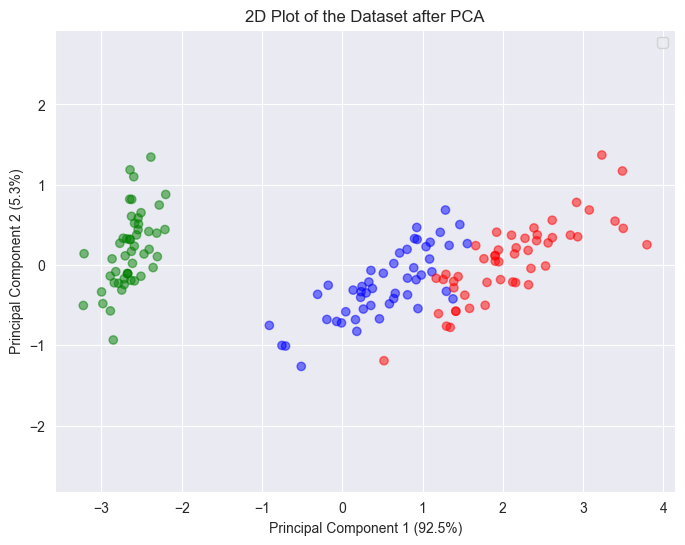

In [3]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
df = pd.concat([X, y], axis=1)

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
value_to_color = {0: 'green', 1: 'blue', 2: 'red'}
colors = [value_to_color[val] for val in numeric_labels]
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [42]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    print(f"Average Normalized Non-specificity value: {np.mean(object_non_specificity)/(np.log2(c))}")
    
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 40.39891104898873]
[2, 39.98603122126409]
[3, 39.89949214067472]
[4, 39.84166112971091]
[5, 39.78944092382015]
[6, 39.73643853329931]
[7, 39.679839536271636]
[8, 39.618755873734855]
[9, 39.553873996506724]
[10, 39.487290228307586]
[11, 39.42211337625696]
[12, 39.36171308924907]
[13, 39.30883310176957]
[14, 39.26497224400039]
[15, 39.23028295746108]
[16, 39.20390476508091]
[17, 39.184455293334295]
[18, 39.170444458627756]
[19, 39.160523034297356]
[20, 39.15358463864303]
[21, 39.148776364865434]
[22, 39.1454665288788]
[23, 39.14319957863054]
[24, 39.1416528646903]
[25, 39.14060071641555]
[26, 39.139886698603796]
[ 0.        39.1398867 39.1398867]
[1, 40.3001033302594]
[2, 39.94870440566841]
[3, 39.86546937594631]
[4, 39.80597902404369]
[5, 39.75029890364783]
[6, 39.69295715316418]
[7, 39.631938382489594]
[8, 39.567266902643034]
[9, 39.50059949502276]
[10, 39.43479514296677]
[11, 39.373183857442456]
[12, 39.31865921691672]
[13, 39.27297091675166]
[14, 39.23651308720511]
[15, 39.208586

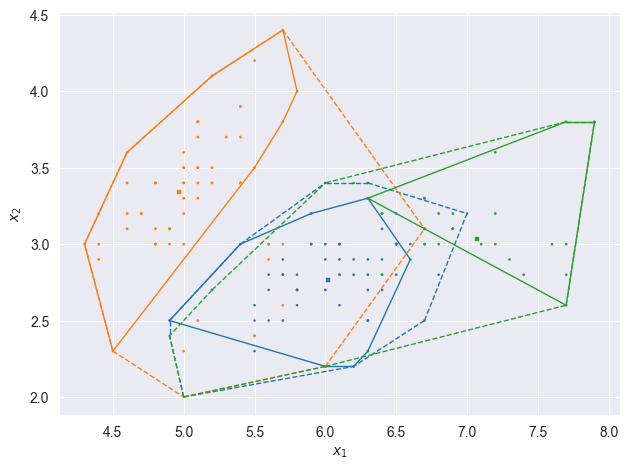

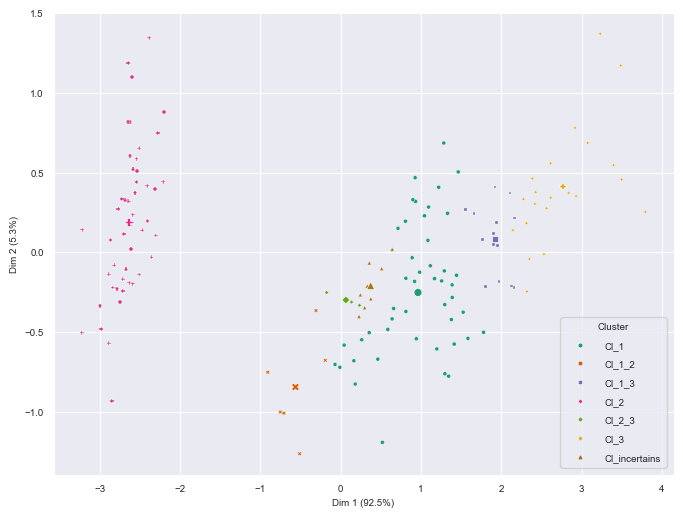

----------Traditional ECM----------
Jbest: 39.139886698603796
Centers: 
 [[6.01228136 2.76676742 4.77798078 1.64339578]
 [4.96394553 3.34645194 1.49205367 0.24702797]
 [7.06604033 3.03719846 6.06446877 2.14774244]]
Adjusted Rand Index (ARI): 0.5987303078930358
Maximum Non-specificity value: 6.858599945191292
Minimum Non-specificity value: 0.3620316491058242
Average Non-specificity value: 1.5002743260112485
Average Normalized Non-specificity value: 0.9465677107998615


In [43]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=10)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Weighted ECM (WECM)

Initial weights: 
 [[0.07519226 0.28935041 0.16184003 0.4736173 ]
 [0.09254051 0.25118474 0.4432175  0.21305725]
 [0.22321534 0.24617335 0.0983041  0.43230721]]
---------Iteration #1---------
Initial prototypes: 
 [[5.006      3.418      1.464      0.244     ]
 [5.885      2.74       4.37666667 1.41833333]
 [6.8275     3.07       5.7        2.0625    ]]
[1, 2.2661578943631033]
[2, 2.223067084101253]
[3, 2.215676235794406]
[4, 2.2113946254647208]
[5, 2.2079770343404426]
[6, 2.205022817080076]
[7, 2.202421415134476]
[8, 2.2001155821098]
[9, 2.198058676595991]
[10, 2.1962092232502117]
[11, 2.194531293274548]
[12, 2.192994684193897]
[13, 2.1915744134489348]
[14, 2.190249902137614]
[15, 2.1890041409387657]
[16, 2.187822970049671]
[17, 2.186694509675858]
[18, 2.1856087358954226]
[19, 2.1845571833213744]
[20, 2.183532754700552]
[21, 2.182529620139097]
[22, 2.181543191130326]
[0.         2.18154319 2.18154319]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes

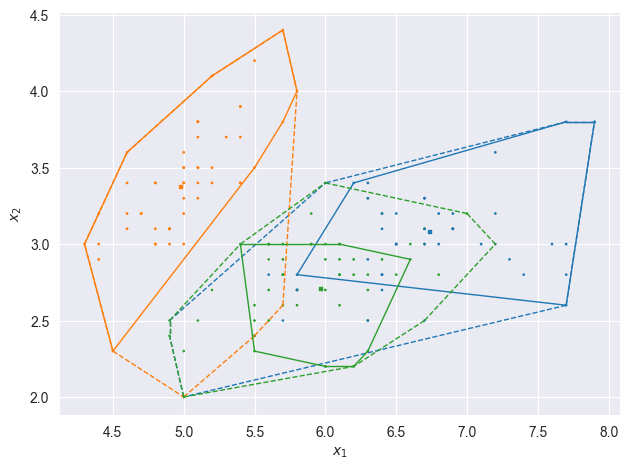

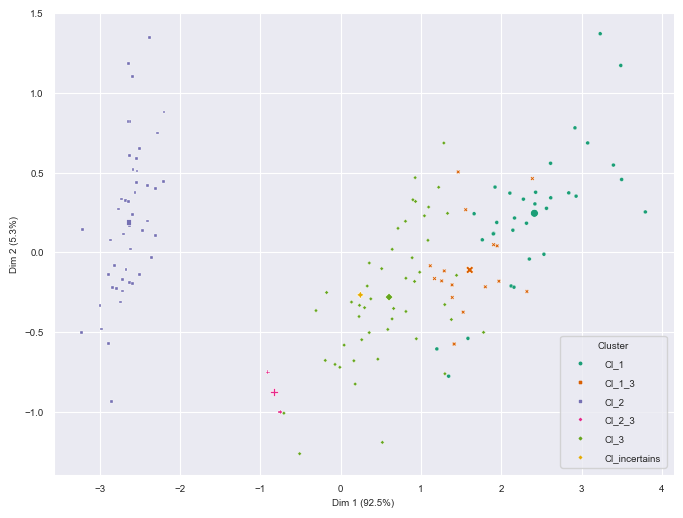

Covariance Matrix 1: [0.3567561  0.0970122  0.26110976 0.0537439 ]
Covariance Matrix 2: [0.12424898 0.14517959 0.03010612 0.01149388]
Covariance Matrix 3: [0.25041496 0.09336645 0.26463472 0.05302747]


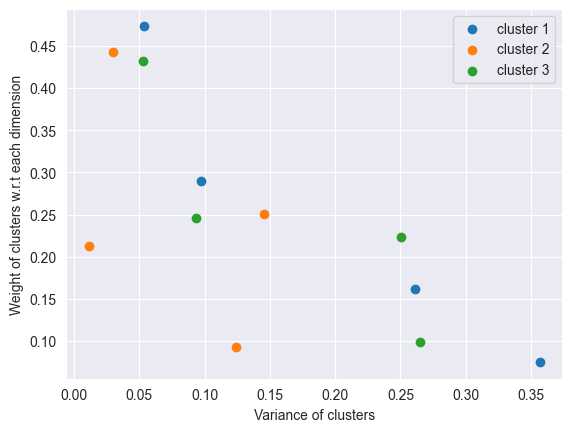

In [44]:
# Feature weighted ECM clustering
W = np.array([
    [0.07519226, 0.28935041, 0.16184003, 0.4736173],
    [0.09254051, 0.25118474, 0.4432175, 0.21305725],
    [0.22321534, 0.24617335, 0.0983041, 0.43230721]
])
c = 3
model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, epsi=1e-3, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")
print(f"Final weights: \n{model['W']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plotting PCA 
ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Weight-Variance correlation plot
W = model['W']
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")
W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label="cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)